In [1]:
from RooPandasFunctions import PSequential,PColumn,PFilter,PRow,PProcessor,PProcRunner,PInitDir
import pandas as pd
from glob import glob
from ROOT import TH1F,TH2F,TLorentzVector,TFile,TCanvas,TLegend,gPad,THStack
from collections import OrderedDict
import numpy as np
import copy
import os
import csv
import warnings
warnings.filterwarnings('ignore')

Welcome to JupyROOT 6.22/00


In [2]:
njet=int(3)
op_massrange="all"
op_aeval="99"
ntoys=0
FromFlatPandas = TFile("FromFlatPandas_AE"+op_aeval+"_M"+op_massrange+"_Njet"+str(njet)+"_ntoys"+str(ntoys)+".root")

In [3]:
for f in FromFlatPandas.GetListOfKeys():
    print(f.GetName())

TRateRateetaL300
TRateRateLetaL300
TRateRateetaL301
TRateRateLetaL301
TRateRateetaL302
TRateRateLetaL302
TRateRatept0jet0
TRateRateLpt0jet0
TRateRatept1jet0
TRateRateLpt1jet0
TRateRatept2jet0
TRateRateLpt2jet0
TRateRatept3jet0
TRateRateLpt3jet0
TRateRatept4jet0
TRateRateLpt4jet0
TRateRatept5jet0
TRateRateLpt5jet0
TRateRatept6jet0
TRateRateLpt6jet0
TRateRatept7jet0
TRateRateLpt7jet0
TRateRatept8jet0
TRateRateLpt8jet0
TRateRatept9jet0
TRateRateLpt9jet0
TRateRatept10jet0
TRateRateLpt10jet0
TRateRatept11jet0
TRateRateLpt11jet0
TRateRatept12jet0
TRateRateLpt12jet0
TRateRatept13jet0
TRateRateLpt13jet0
TRateRatept14jet0
TRateRateLpt14jet0
TRateRatept15jet0
TRateRateLpt15jet0
TRateRatept16jet0
TRateRateLpt16jet0
TRateRatept17jet0
TRateRateLpt17jet0
TRateRatept18jet0
TRateRateLpt18jet0
TRateRatept19jet0
TRateRateLpt19jet0
TRateRatept20jet0
TRateRateLpt20jet0
TRateRatept21jet0
TRateRateLpt21jet0
TRateRatept22jet0
TRateRateLpt22jet0
TRateRatept23jet0
TRateRateLpt23jet0
TRateRatept24jet0
TRateRate

QCD_HT1500to2000__etaT1_pt36
QCD_HT1500to2000__etaL301_pt36
QCD_HT1500to2000__etaT211_pt36
QCD_HT1500to2000__etaL211_pt36
QCD_HT1500to2000__etaL1_pt37
QCD_HT1500to2000__etaT1_pt37
QCD_HT1500to2000__etaL301_pt37
QCD_HT1500to2000__etaT211_pt37
QCD_HT1500to2000__etaL211_pt37
QCD_HT1500to2000__etaL1_pt38
QCD_HT1500to2000__etaT1_pt38
QCD_HT1500to2000__etaL301_pt38
QCD_HT1500to2000__etaT211_pt38
QCD_HT1500to2000__etaL211_pt38
QCD_HT1500to2000__etaL1_pt39
QCD_HT1500to2000__etaT1_pt39
QCD_HT1500to2000__etaL301_pt39
QCD_HT1500to2000__etaT211_pt39
QCD_HT1500to2000__etaL211_pt39
QCD_HT1500to2000__ht_LT21
QCD_HT1500to2000__pt0_LT21
QCD_HT1500to2000__abseta0_LT21
QCD_HT1500to2000__pt1_LT21
QCD_HT1500to2000__abseta1_LT21
QCD_HT1500to2000__pt2_LT21
QCD_HT1500to2000__abseta2_LT21
QCD_HT1500to2000__etaL2_pt0
QCD_HT1500to2000__etaT2_pt0
QCD_HT1500to2000__etaL302_pt0
QCD_HT1500to2000__etaT212_pt0
QCD_HT1500to2000__etaL212_pt0
QCD_HT1500to2000__etaL2_pt1
QCD_HT1500to2000__etaT2_pt1
QCD_HT1500to2000__etaL3

QCD__etaL301_pt4
QCD__etaT211_pt4
QCD__etaL211_pt4
QCD__etaL1_pt5
QCD__etaT1_pt5
QCD__etaL301_pt5
QCD__etaT211_pt5
QCD__etaL211_pt5
QCD__etaL1_pt6
QCD__etaT1_pt6
QCD__etaL301_pt6
QCD__etaT211_pt6
QCD__etaL211_pt6
QCD__etaL1_pt7
QCD__etaT1_pt7
QCD__etaL301_pt7
QCD__etaT211_pt7
QCD__etaL211_pt7
QCD__etaL1_pt8
QCD__etaT1_pt8
QCD__etaL301_pt8
QCD__etaT211_pt8
QCD__etaL211_pt8
QCD__etaL1_pt9
QCD__etaT1_pt9
QCD__etaL301_pt9
QCD__etaT211_pt9
QCD__etaL211_pt9
QCD__etaL1_pt10
QCD__etaT1_pt10
QCD__etaL301_pt10
QCD__etaT211_pt10
QCD__etaL211_pt10
QCD__etaL1_pt11
QCD__etaT1_pt11
QCD__etaL301_pt11
QCD__etaT211_pt11
QCD__etaL211_pt11
QCD__etaL1_pt12
QCD__etaT1_pt12
QCD__etaL301_pt12
QCD__etaT211_pt12
QCD__etaL211_pt12
QCD__etaL1_pt13
QCD__etaT1_pt13
QCD__etaL301_pt13
QCD__etaT211_pt13
QCD__etaL211_pt13
QCD__etaL1_pt14
QCD__etaT1_pt14
QCD__etaL301_pt14
QCD__etaT211_pt14
QCD__etaL211_pt14
QCD__etaL1_pt15
QCD__etaT1_pt15
QCD__etaL301_pt15
QCD__etaT211_pt15
QCD__etaL211_pt15
QCD__etaL1_pt16
QCD__etaT1_p

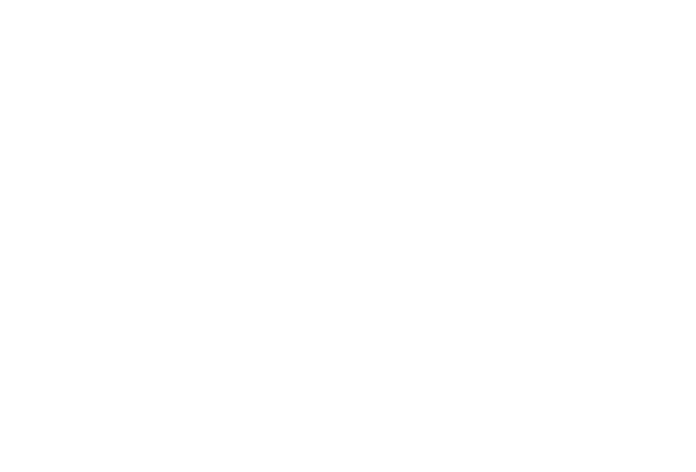

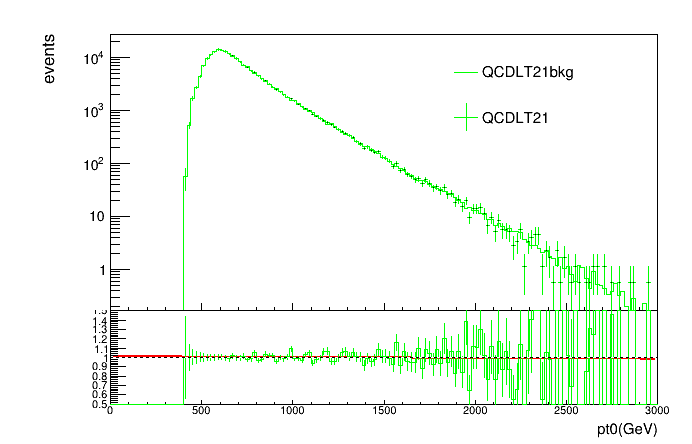

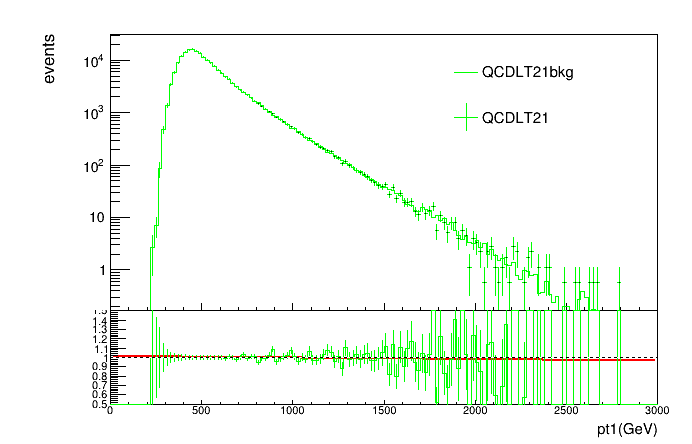

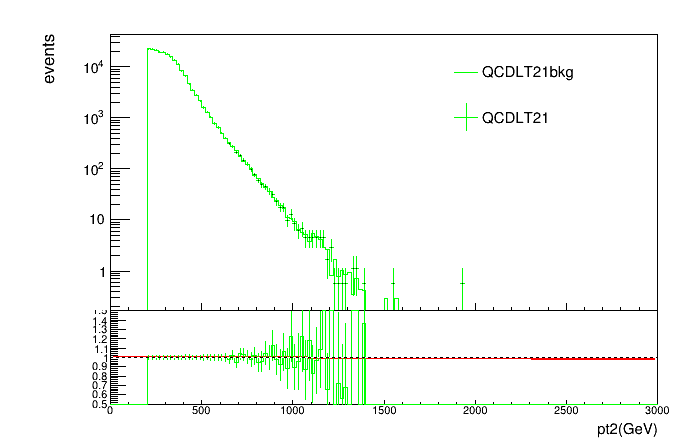

In [4]:
canv=TCanvas("canv","canv",700,500)
FromFlatPandas.pt0QCD.Draw()
FromFlatPandas.pt1QCD.Draw()
FromFlatPandas.pt2QCD.Draw()
canv.Draw()

In [5]:
#load
#QCD_ht_errors = np.load("QCD_ht_errors"+"_AE"+op_aeval+"_M"+op_massrange+"_Njet"+str(njet)+"_ntoys"+str(ntoys)+".npy",allow_pickle='TRUE').item()
#QCD_ht_means = np.load("QCD_ht_means"+"_AE"+op_aeval+"_M"+op_massrange+"_Njet"+str(njet)+"_ntoys"+str(ntoys)+".npy",allow_pickle='TRUE').item()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


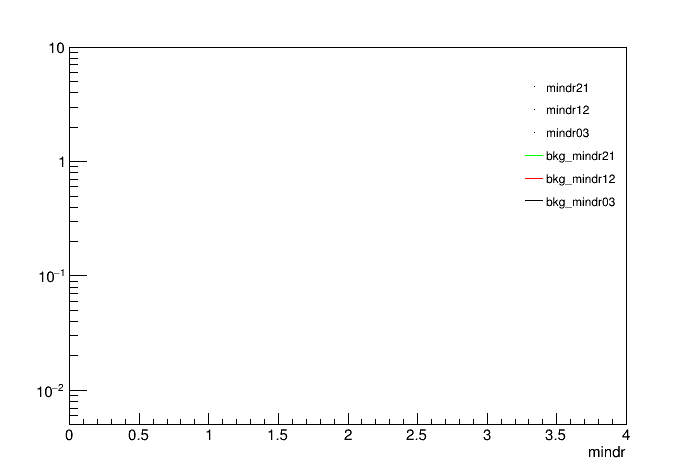

In [6]:
canv=TCanvas("canv","canv",700,500)

QCD_mindr = TH1F("QCD__mindr","QCD__mindr",100,0,4)
bkgQCD_mindr = TH1F("bkgQCD__mindr","bkgQCD__mindr",100,0,4)

mindr={"0":[],"1":[],"2":[],"3":[]}
bkg_mindr={"0":[],"1":[],"2":[],"3":[]}

for ijet in range(njet+1):
    regionstr="LT"+str(ijet)+str(njet-ijet)
    for f in FromFlatPandas.GetListOfKeys():
        if("QCD__mindr" in f.GetName() and regionstr in f.GetName()):
            mindr[str(ijet)].append(f.GetName())
        elif("QCD__bkg_mindr" in f.GetName() and regionstr in f.GetName()):
            bkg_mindr[str(ijet)].append(f.GetName())

mindr0=TH1F("mindr03","mindr03",100,0,4)
mindr1=TH1F("mindr12","mindr12",100,0,4)
mindr2=TH1F("mindr21","mindr21",100,0,4)
mindr3=TH1F("mindr30","mindr30",100,0,4)
bkg_mindr0=TH1F("bkg_mindr03","bkg_mindr03",100,0,4)
bkg_mindr1=TH1F("bkg_mindr12","bkg_mindr12",100,0,4)
bkg_mindr2=TH1F("bkg_mindr21","bkg_mindr21",100,0,4)
bkg_mindr3=TH1F("bkg_mindr30","bkg_mindr30",100,0,4)

for i in range(njet+1):
    for j in mindr[str(i)]:
        if i == 0:
            temphist = FromFlatPandas.Get(j)
            mindr0 += temphist
        if i == 1:
            temphist = FromFlatPandas.Get(j)
            mindr1 += temphist
        if i == 2:
            temphist = FromFlatPandas.Get(j)
            mindr2 += temphist
        if i == 3:
            temphist = FromFlatPandas.Get(j)
            mindr3 += temphist   
for i in range(njet+1):
    for j in bkg_mindr[str(i)]:
        if i == 0:
            temphist = FromFlatPandas.Get(j)
            bkg_mindr0 += temphist
        if i == 1:
            temphist = FromFlatPandas.Get(j)
            bkg_mindr1 += temphist
        if i == 2:
            temphist = FromFlatPandas.Get(j)
            bkg_mindr2 += temphist
        if i == 3:
            temphist = FromFlatPandas.Get(j)
            bkg_mindr3 += temphist

mindr0.SetTitle("")
mindr0.SetStats(0)
mindr0.GetXaxis().SetTitle("mindr")
mindr0.SetMaximum(1.2*max(max(mindr0),max(mindr1),max(mindr2)))

mindr3.SetLineColor(4)
bkg_mindr3.SetLineColor(4)
mindr2.SetLineColor(3)
bkg_mindr2.SetLineColor(3)
mindr1.SetLineColor(2)
bkg_mindr1.SetLineColor(2)
mindr0.SetLineColor(1)
bkg_mindr0.SetLineColor(1)

#mindr3.Draw("")
mindr0.Draw("")
mindr2.Draw("same")
mindr1.Draw("same")
#bkg_mindr3.Draw("histsame")
bkg_mindr2.Draw("histsame")
bkg_mindr1.Draw("histsame")
bkg_mindr0.Draw("histsame")

leg1 = TLegend(0.75, 0.55, 0.89, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
#leg1.AddEntry(mindr3,'mindr30','P')
leg1.AddEntry(mindr2,'mindr21','P')
leg1.AddEntry(mindr1,'mindr12','P')
leg1.AddEntry(mindr0,'mindr03','P')
#leg1.AddEntry(bkg_mindr3,'bkg_mindr30','L')
leg1.AddEntry(bkg_mindr2,'bkg_mindr21','L')
leg1.AddEntry(bkg_mindr1,'bkg_mindr12','L')
leg1.AddEntry(bkg_mindr0,'bkg_mindr03','L')
leg1.Draw()

canv.SetLogy()
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


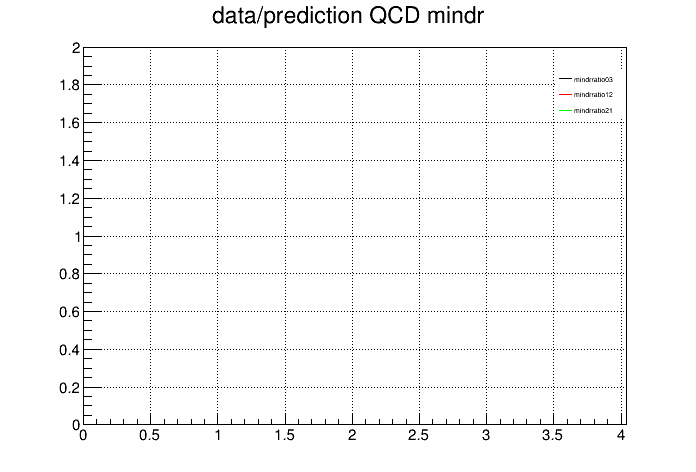

In [7]:
totQCDjetmindr = mindr0 + mindr1 + mindr2 + mindr3
bkg_totQCDjetmindr = bkg_mindr0 + bkg_mindr1 + bkg_mindr2 + bkg_mindr3

#mindr0.Rebin(2)
#bkg_mindr0.Rebin(2)
#mindr1.Rebin(2)
#bkg_mindr1.Rebin(2)
#mindr2.Rebin(2)
#bkg_mindr2.Rebin(2)
#mindr3.Rebin(2)
#bkg_mindr3.Rebin(2)
#totQCDjetmindr.Rebin(2)
#bkg_totQCDjetmindr.Rebin(2)


mindrratio03 = mindr0/bkg_mindr0
mindrratio12 = mindr1/bkg_mindr1
mindrratio21 = mindr2/bkg_mindr2
mindrratio30 = mindr3/bkg_mindr3
mindrratioTOT = totQCDjetmindr/bkg_totQCDjetmindr

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

mindrratio03.SetTitle("data/prediction QCD mindr;;")
mindrratio03.GetXaxis().SetRangeUser(0,3500)
mindrratio03.SetStats(0)
mindrratio03.SetMaximum(2)
mindrratio03.SetMinimum(0)

mindrratio03.SetLineColor(1)
mindrratio12.SetLineColor(2)
mindrratio21.SetLineColor(3)
mindrratio30.SetLineColor(4)
mindrratio03.Draw("P")
mindrratio12.Draw("same")
mindrratio21.Draw("same")
#mindrratio30.Draw("same")

leg1 = TLegend(0.80, 0.75, 0.90, 0.85)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(mindrratio03,'mindrratio03','L')
leg1.AddEntry(mindrratio12,'mindrratio12','L')
leg1.AddEntry(mindrratio21,'mindrratio21','L')
#leg1.AddEntry(mindrratio30,'mindrratio30','L')


leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


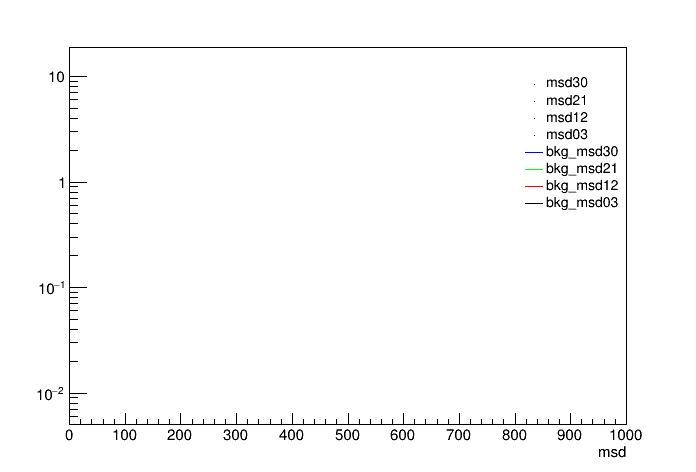

In [8]:
canv=TCanvas("canv","canv",700,500)

QCD_msd = TH1F("QCD__msd","QCD__msd",500,0,1000)
bkgQCD_msd = TH1F("bkgQCD__msd","bkgQCD__msd",500,0,1000)

msd={"0":[],"1":[],"2":[],"3":[]}
bkg_msd={"0":[],"1":[],"2":[],"3":[]}

for ijet in range(njet+1):
    regionstr="LT"+str(ijet)+str(njet-ijet)
    for f in FromFlatPandas.GetListOfKeys():
        if("QCD__msd" in f.GetName() and regionstr in f.GetName()):
            print("msd: ",f.GetName())
            msd[str(ijet)].append(f.GetName())
        elif("QCD__bkg_msd" in f.GetName() and regionstr in f.GetName()):
            bkg_msd[str(ijet)].append(f.GetName())
            print("bkg_msd: ",f.GetName())

msd0=TH1F("msd03","msd03",500,0,1000)
msd1=TH1F("msd12","msd12",500,0,1000)
msd2=TH1F("msd21","msd21",500,0,1000)
msd3=TH1F("msd30","msd30",500,0,1000)
bkg_msd0=TH1F("bkg_msd03","bkg_msd03",500,0,1000)
bkg_msd1=TH1F("bkg_msd12","bkg_msd12",500,0,1000)
bkg_msd2=TH1F("bkg_msd21","bkg_msd21",500,0,1000)
bkg_msd3=TH1F("bkg_msd30","bkg_msd30",500,0,1000)

for i in range(njet+1):
    for j in msd[str(i)]:
        if i == 0:
            temphist = FromFlatPandas.Get(j)
            msd0 += temphist
        if i == 1:
            temphist = FromFlatPandas.Get(j)
            msd1 += temphist
        if i == 2:
            temphist = FromFlatPandas.Get(j)
            msd2 += temphist
        if i == 3:
            temphist = FromFlatPandas.Get(j)
            msd3 += temphist   
for i in range(njet+1):
    for j in bkg_msd[str(i)]:
        if i == 0:
            temphist = FromFlatPandas.Get(j)
            bkg_msd0 += temphist
        if i == 1:
            temphist = FromFlatPandas.Get(j)
            bkg_msd1 += temphist
        if i == 2:
            temphist = FromFlatPandas.Get(j)
            bkg_msd2 += temphist
        if i == 3:
            temphist = FromFlatPandas.Get(j)
            bkg_msd3 += temphist

msd3.SetTitle("")
msd3.SetStats(0)
msd3.GetXaxis().SetTitle("msd")

msd3.SetLineColor(4)
bkg_msd3.SetLineColor(4)
msd2.SetLineColor(3)
bkg_msd2.SetLineColor(3)
msd1.SetLineColor(2)
bkg_msd1.SetLineColor(2)
msd0.SetLineColor(1)
bkg_msd0.SetLineColor(1)

msd3.Draw("")
msd2.Draw("same")
msd1.Draw("same")
msd0.Draw("same")
bkg_msd3.Draw("histsame")
bkg_msd2.Draw("histsame")
bkg_msd1.Draw("histsame")
bkg_msd0.Draw("histsame")

leg1 = TLegend(0.75, 0.55, 0.89, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(msd3,'msd30','P')
leg1.AddEntry(msd2,'msd21','P')
leg1.AddEntry(msd1,'msd12','P')
leg1.AddEntry(msd0,'msd03','P')
leg1.AddEntry(bkg_msd3,'bkg_msd30','L')
leg1.AddEntry(bkg_msd2,'bkg_msd21','L')
leg1.AddEntry(bkg_msd1,'bkg_msd12','L')
leg1.AddEntry(bkg_msd0,'bkg_msd03','L')
leg1.Draw()

canv.SetLogy()
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


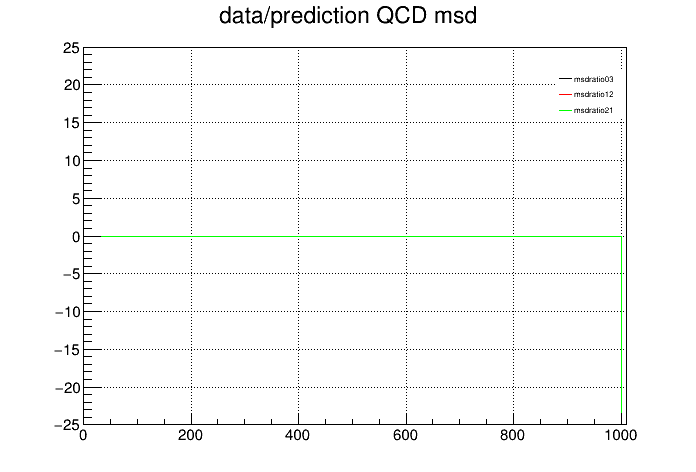

In [9]:
totQCDjetmsd = msd0 + msd1 + msd2 + msd3
bkg_totQCDjetmsd = bkg_msd0 + bkg_msd1 + bkg_msd2 + bkg_msd3

msd0.Rebin(5)
bkg_msd0.Rebin(5)
msd1.Rebin(5)
bkg_msd1.Rebin(5)
msd2.Rebin(5)
bkg_msd2.Rebin(5)
msd3.Rebin(5)
bkg_msd3.Rebin(5)
totQCDjetmsd.Rebin(5)
bkg_totQCDjetmsd.Rebin(5)


msdratio03 = msd0/bkg_msd0
msdratio12 = msd1/bkg_msd1
msdratio21 = msd2/bkg_msd2
msdratio30 = msd3/bkg_msd3
msdratioTOT = totQCDjetmsd/bkg_totQCDjetmsd

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

msdratio03.SetTitle("data/prediction QCD msd;;")
msdratio03.GetXaxis().SetRangeUser(0,3500)
msdratio03.SetStats(0)
msdratio03.SetMaximum(25)
msdratio03.SetMinimum(-25)

msdratio03.SetLineColor(1)
msdratio12.SetLineColor(2)
msdratio21.SetLineColor(3)
#msdratio30.SetLineColor(4)
msdratio03.Draw("P")
msdratio12.Draw("same")
msdratio21.Draw("same")
#msdratio30.Draw("same")

leg1 = TLegend(0.80, 0.75, 0.90, 0.85)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(msdratio03,'msdratio03','L')
leg1.AddEntry(msdratio12,'msdratio12','L')
leg1.AddEntry(msdratio21,'msdratio21','L')
#leg1.AddEntry(msdratio30,'msdratio30','L')


leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


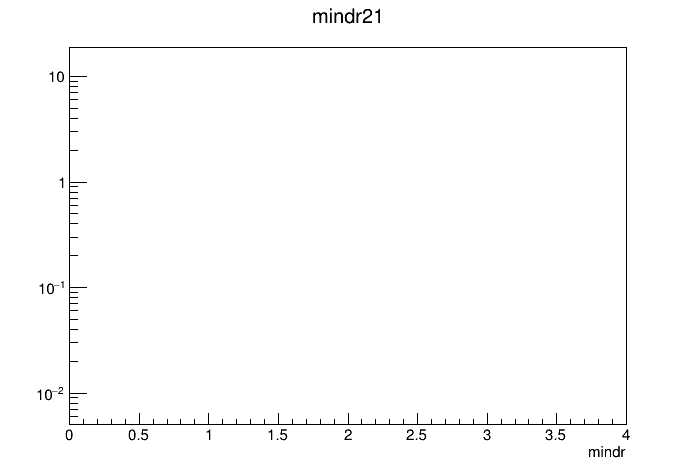

In [10]:
canv=TCanvas("canv","canv",700,500)
mindr2.SetStats(0)
mindr2.GetXaxis().SetTitle("mindr")
mindr2.Draw("")
bkg_mindr2.Draw("histsame")
canv.SetLogy()
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


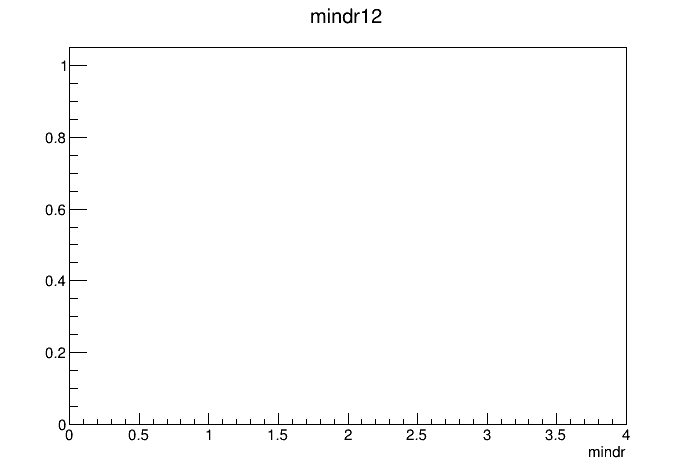

In [11]:
canv=TCanvas("canv","canv",700,500)
mindr1.SetStats(0)
mindr1.GetXaxis().SetTitle("mindr")
mindr1.Draw("")
bkg_mindr1.Draw("histsame")
canv.RedrawAxis()
canv.Draw()

In [12]:
#canv=TCanvas("canv","canv",700,500)
#
#FromFlatPandas.TRateE0.SetTitle("")
#FromFlatPandas.TRateE0.SetStats(0)
#FromFlatPandas.TRateE0.GetXaxis().SetTitle("pt")
#FromFlatPandas.TRateE0.GetYaxis().SetTitle("Trate")
#FromFlatPandas.TRateE0.SetMaximum(1.2*max(max(FromFlatPandas.TRateE0),max(FromFlatPandas.TRateE1),max(FromFlatPandas.TRateE2),max(FromFlatPandas.TRateE3)))
#
#FromFlatPandas.TRateE0.SetLineColor(1)
#FromFlatPandas.TRateE1.SetLineColor(2)
#FromFlatPandas.TRateE2.SetLineColor(3)
#FromFlatPandas.TRateE3.SetLineColor(4)
#
#FromFlatPandas.TRateE0.Draw()
#FromFlatPandas.TRateE1.Draw("same")
#FromFlatPandas.TRateE2.Draw("same")
#FromFlatPandas.TRateE3.Draw("same")
#
#leg1 = TLegend(0.70, 0.70, 0.85, 0.85)
#leg1.SetFillColor(0)
#leg1.SetBorderSize(0)
#leg1.AddEntry(FromFlatPandas.TRateE0,'EtaRegion0','L')
#leg1.AddEntry(FromFlatPandas.TRateE1,'EtaRegion1','L')
#leg1.AddEntry(FromFlatPandas.TRateE2,'EtaRegion2','L')
#leg1.AddEntry(FromFlatPandas.TRateE3,'EtaRegion3','L')
#leg1.Draw()
#
#canv.RedrawAxis()
#canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


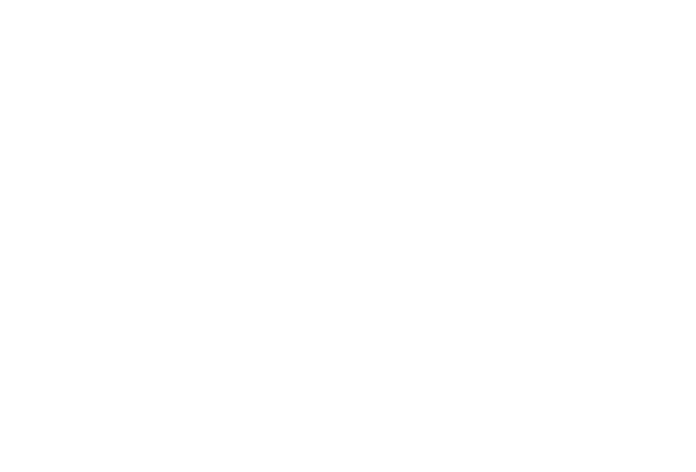

In [13]:
c=1
canv=TCanvas("canv","canv",700,500)
leg1 = TLegend(0.75, 0.45, 0.90, 0.89)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

for f in FromFlatPandas.GetListOfKeys():
    if("TRatept" in f.GetName()):
        if(f.GetName()=="TRatept0"):
            continue
        elif(f.GetName()=="TRatept1"):
            print("Integral1: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
            Tratepthist = FromFlatPandas.Get(f.GetName())
            Tratepthist.SetTitle("")
            Tratepthist.GetXaxis().SetTitle("abseta")
            Tratepthist.GetYaxis().SetTitle("Trate")
            Tratepthist.SetLineColor(c)
            c+=1
            Tratepthist.SetStats(0)
            Tratepthist.SetMaximum(0.008)
            Tratepthist.Draw()
            #Tratepthist.Fit("pol2")
            leg1.AddEntry(Tratepthist,str(f.GetName()),'L')
        else:
            print("Integral: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
            Tratepthist = FromFlatPandas.Get(f.GetName())
            Tratepthist.SetLineColor(c)
            c+=1
            Tratepthist.Draw("same")
            #ratepthist.Fit("pol2")
            leg1.AddEntry(Tratepthist,str(f.GetName()),'L')
#leg1.Draw()    
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


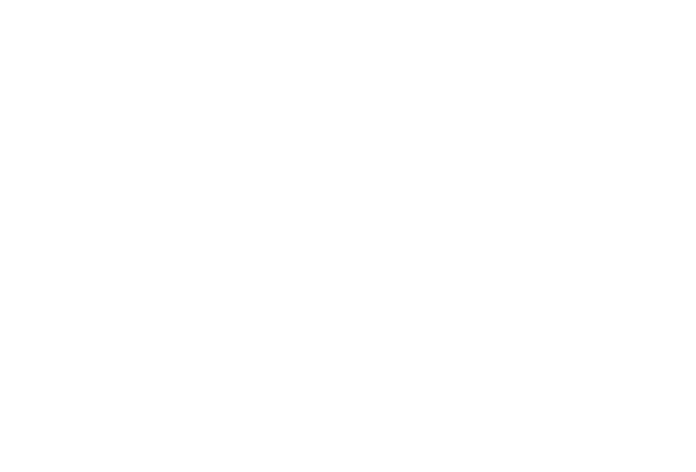

In [14]:
c=1
canv=TCanvas("canv","canv",700,500)
leg1 = TLegend(0.75, 0.15, 0.90, 0.30)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

for f in FromFlatPandas.GetListOfKeys():
    if("TRateE" in f.GetName()):
        if(f.GetName()=="TRateE0"):
            print("Integral1: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
            Tratepthist = FromFlatPandas.Get(f.GetName())
            Tratepthist.SetTitle("")
            Tratepthist.GetXaxis().SetTitle("pt")
            Tratepthist.GetXaxis().SetRangeUser(200,900)
            Tratepthist.GetYaxis().SetTitle("Trate")
            Tratepthist.SetLineColor(c)
            c+=1
            Tratepthist.SetStats(0)
            #Tratepthist.SetMaximum(0.015)
            Tratepthist.Draw()
            leg1.AddEntry(Tratepthist,str(f.GetName()),'L')
        else:
            print("Integral: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
            Tratepthist = FromFlatPandas.Get(f.GetName())
            Tratepthist.SetLineColor(c)
            c+=1
            Tratepthist.Draw("same")
            leg1.AddEntry(Tratepthist,str(f.GetName()),'L')
leg1.Draw()    
canv.RedrawAxis()
canv.Draw()

{'LT03', 'LT21', 'LT12', 'LT30'}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


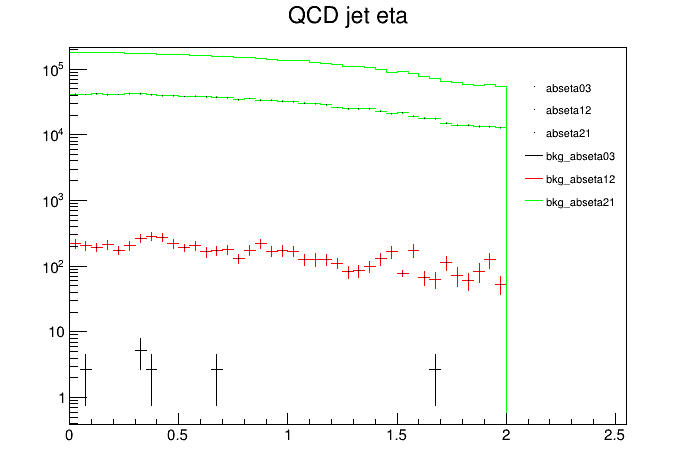

In [15]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    try:
        if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
            if("abseta" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
                for i in range(njet+1):
                    if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                        arr.append(f.GetName().split("__")[1].split("_")[1])
    except Exception as e: print(e)
arrs = set(arr)
print(arrs)

abseta={"0":[],"1":[],"2":[],"3":[]}
absetasums0=TH1F("abseta03","abseta03",50,0,2.5)
absetasums1=TH1F("abseta12","abseta12",50,0,2.5)
absetasums2=TH1F("abseta21","abseta21",50,0,2.5)
absetasums3=TH1F("abseta30","abseta30",50,0,2.5)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("abseta" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                    abseta[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in abseta[str(i)]:
        if i == 0:
            #print(j)
            absetasums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            absetasums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            absetasums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            absetasums3 += FromFlatPandas.Get(j)

bkg_abseta={"0":[],"1":[],"2":[],"3":[]}
bkg_absetasums0=TH1F("bkg_abseta03","bkg_abseta03",50,0,2.5)
bkg_absetasums1=TH1F("bkg_abseta12","bkg_abseta12",50,0,2.5)
bkg_absetasums2=TH1F("bkg_abseta21","bkg_abseta21",50,0,2.5)
bkg_absetasums3=TH1F("bkg_abseta30","bkg_abseta30",50,0,2.5)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("abseta" in f.GetName() and ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                    bkg_abseta[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_abseta[str(i)]:
        if i == 0:
            temphist = FromFlatPandas.Get(j)
            #print(temphist.Integral())
            bkg_absetasums0 += temphist
        if i == 1:
            bkg_absetasums1 += FromFlatPandas.Get(j)
        if i == 2:
            bkg_absetasums2 += FromFlatPandas.Get(j)
        if i == 3:
            bkg_absetasums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

absetasums0.SetTitle("QCD jet eta")
absetasums0.SetStats(0)
absetasums0.SetMaximum(1.2*max(max(absetasums0),max(absetasums1),max(absetasums2),max(bkg_absetasums0),max(bkg_absetasums1),max(bkg_absetasums2)))
absetasums0.GetXaxis().SetRangeUser(0,5.0)
absetasums0.SetLineColor(1)
absetasums1.SetLineColor(2)
absetasums2.SetLineColor(3)
absetasums3.SetLineColor(4)

bkg_absetasums0.SetLineColor(1)
bkg_absetasums1.SetLineColor(2)
bkg_absetasums2.SetLineColor(3)
bkg_absetasums3.SetLineColor(4)

absetasums0.Draw()
absetasums1.Draw("same")
absetasums2.Draw("same")
#absetasums3.Draw("same")
bkg_absetasums0.Draw("histsame")
bkg_absetasums1.Draw("histsame")
bkg_absetasums2.Draw("histsame")
#bkg_absetasums3.Draw("histsame")

leg1 = TLegend(0.75, 0.55, 0.89, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(absetasums0,'abseta03','P')
leg1.AddEntry(absetasums1,'abseta12','P')
leg1.AddEntry(absetasums2,'abseta21','P')
#leg1.AddEntry(absetasums3,'abseta30','P')
leg1.AddEntry(bkg_absetasums0,'bkg_abseta03','L')
leg1.AddEntry(bkg_absetasums1,'bkg_abseta12','L')
leg1.AddEntry(bkg_absetasums2,'bkg_abseta21','L')
#leg1.AddEntry(bkg_absetasums3,'bkg_abseta30','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


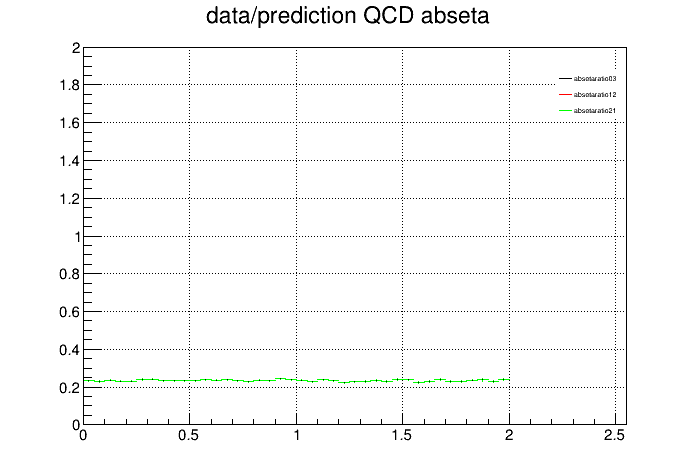

In [16]:
totQCDjetabseta = absetasums0 + absetasums1 + absetasums2 + absetasums3
bkg_totQCDjetabseta = bkg_absetasums0 + bkg_absetasums1 + bkg_absetasums2 + bkg_absetasums3

#absetasums0.Rebin(2)
#bkg_absetasums0.Rebin(2)
#absetasums1.Rebin(2)
#bkg_absetasums1.Rebin(2)
#absetasums2.Rebin(2)
#bkg_absetasums2.Rebin(2)
#absetasums3.Rebin(2)
#bkg_absetasums3.Rebin(2)
#totQCDjetabseta.Rebin(2)
#bkg_totQCDjetabseta.Rebin(2)


absetaratio03 = absetasums0/bkg_absetasums0
absetaratio12 = absetasums1/bkg_absetasums1
absetaratio21 = absetasums2/bkg_absetasums2
absetaratio30 = absetasums3/bkg_absetasums3
absetaratioTOT = totQCDjetabseta/bkg_totQCDjetabseta

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

absetaratio03.SetTitle("data/prediction QCD abseta;;")
absetaratio03.GetXaxis().SetRangeUser(0,3500)
absetaratio03.SetStats(0)
absetaratio03.SetMaximum(2)
absetaratio03.SetMinimum(0)

absetaratio03.SetLineColor(1)
absetaratio12.SetLineColor(2)
absetaratio21.SetLineColor(3)
absetaratio30.SetLineColor(4)
absetaratio03.Draw("P")
absetaratio12.Draw("same")
absetaratio21.Draw("same")
#absetaratio30.Draw("same")

leg1 = TLegend(0.80, 0.75, 0.90, 0.85)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(absetaratio03,'absetaratio03','L')
leg1.AddEntry(absetaratio12,'absetaratio12','L')
leg1.AddEntry(absetaratio21,'absetaratio21','L')
#leg1.AddEntry(absetaratio30,'absetaratio30','L')


leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Draw()

set()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


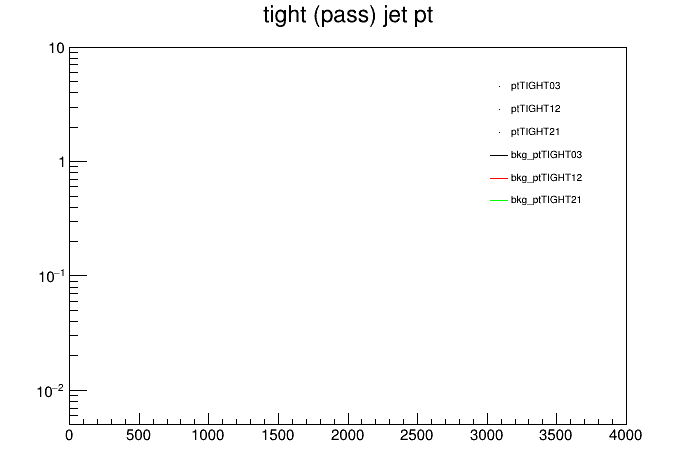

In [17]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    try:
        if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
            if("ptTIGHT" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
                for i in range(njet+1):
                    if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                        arr.append(f.GetName().split("__")[1].split("_")[1])
    except Exception as e: print(e)
arrs = set(arr)
print(arrs)

ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
ptTIGHTsums0=TH1F("ptTIGHT03","ptTIGHT03",1000,0,10000)
ptTIGHTsums1=TH1F("ptTIGHT12","ptTIGHT12",1000,0,10000)
ptTIGHTsums2=TH1F("ptTIGHT21","ptTIGHT21",1000,0,10000)
ptTIGHTsums3=TH1F("ptTIGHT30","ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptTIGHT" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                    ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            ptTIGHTsums3 += FromFlatPandas.Get(j)

bkg_ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
bkg_ptTIGHTsums0=TH1F("bkg_ptTIGHT03","bkg_ptTIGHT03",1000,0,10000)
bkg_ptTIGHTsums1=TH1F("bkg_ptTIGHT12","bkg_ptTIGHT12",1000,0,10000)
bkg_ptTIGHTsums2=TH1F("bkg_ptTIGHT21","bkg_ptTIGHT21",1000,0,10000)
bkg_ptTIGHTsums3=TH1F("bkg_ptTIGHT30","bkg_ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptTIGHT" in f.GetName() and ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                    bkg_ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            bkg_ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            bkg_ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            bkg_ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            bkg_ptTIGHTsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptTIGHTsums0.SetTitle("tight (pass) jet pt")
ptTIGHTsums0.SetStats(0)
ptTIGHTsums0.GetXaxis().SetRangeUser(0,4000)
ptTIGHTsums0.SetMaximum(1.2*max(max(ptTIGHTsums0),max(ptTIGHTsums1),max(ptTIGHTsums2),max(bkg_ptTIGHTsums0),max(bkg_ptTIGHTsums1),max(bkg_ptTIGHTsums2)))

ptTIGHTsums0.SetLineColor(1)
ptTIGHTsums1.SetLineColor(2)
ptTIGHTsums2.SetLineColor(3)

bkg_ptTIGHTsums0.SetLineColor(1)
bkg_ptTIGHTsums1.SetLineColor(2)
bkg_ptTIGHTsums2.SetLineColor(3)

ptTIGHTsums0.Draw()
ptTIGHTsums1.Draw("same")
ptTIGHTsums2.Draw("same")
bkg_ptTIGHTsums0.Draw("histsame")
bkg_ptTIGHTsums1.Draw("histsame")
bkg_ptTIGHTsums2.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTsums0,'ptTIGHT03','P')
leg1.AddEntry(ptTIGHTsums1,'ptTIGHT12','P')
leg1.AddEntry(ptTIGHTsums2,'ptTIGHT21','P')
leg1.AddEntry(bkg_ptTIGHTsums0,'bkg_ptTIGHT03','L')
leg1.AddEntry(bkg_ptTIGHTsums1,'bkg_ptTIGHT12','L')
leg1.AddEntry(bkg_ptTIGHTsums2,'bkg_ptTIGHT21','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

set()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


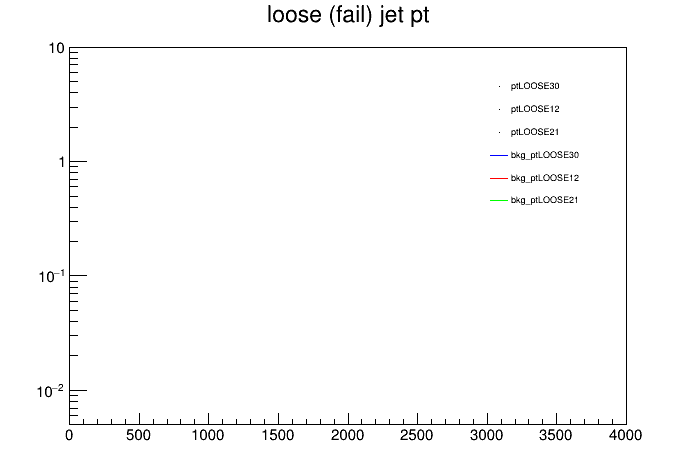

In [18]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    try:
        if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
            if("ptLOOSE" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
                for i in range(njet+1):
                    if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                        arr.append(f.GetName().split("__")[1].split("_")[1])
    except Exception as e: print(e)
arrs = set(arr)
print(arrs)

ptLOOSE={"0":[],"1":[],"2":[],"3":[]}
ptLOOSEsums0=TH1F("ptLOOSE03","ptLOOSE03",1000,0,10000)
ptLOOSEsums1=TH1F("ptLOOSE12","ptLOOSE12",1000,0,10000)
ptLOOSEsums2=TH1F("ptLOOSE21","ptLOOSE21",1000,0,10000)
ptLOOSEsums3=TH1F("ptLOOSE30","ptLOOSE30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptLOOSE" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                    ptLOOSE[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in ptLOOSE[str(i)]:
        if i == 0:
            ptLOOSEsums0 += FromFlatPandas.Get(j)
        if i == 1:
            ptLOOSEsums1 += FromFlatPandas.Get(j)
        if i == 2:
            ptLOOSEsums2 += FromFlatPandas.Get(j)
        if i == 3:
            ptLOOSEsums3 += FromFlatPandas.Get(j)

bkg_ptLOOSE={"0":[],"1":[],"2":[],"3":[]}
bkg_ptLOOSEsums0=TH1F("bkg_ptLOOSE03","bkg_ptLOOSE03",1000,0,10000)
bkg_ptLOOSEsums1=TH1F("bkg_ptLOOSE12","bkg_ptLOOSE12",1000,0,10000)
bkg_ptLOOSEsums2=TH1F("bkg_ptLOOSE21","bkg_ptLOOSE21",1000,0,10000)
bkg_ptLOOSEsums3=TH1F("bkg_ptLOOSE30","bkg_ptLOOSE30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptLOOSE" in f.GetName() and ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                    bkg_ptLOOSE[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_ptLOOSE[str(i)]:
        if i == 0:
            bkg_ptLOOSEsums0 += FromFlatPandas.Get(j)
        if i == 1:
            bkg_ptLOOSEsums1 += FromFlatPandas.Get(j)
        if i == 2:
            bkg_ptLOOSEsums2 += FromFlatPandas.Get(j)
        if i == 3:
            bkg_ptLOOSEsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptLOOSEsums3.SetTitle("loose (fail) jet pt")
ptLOOSEsums3.SetStats(0)
ptLOOSEsums3.GetXaxis().SetRangeUser(0,4000)
ptLOOSEsums3.SetMaximum(1.2*max(max(ptLOOSEsums3),max(ptLOOSEsums1),max(ptLOOSEsums2),max(bkg_ptLOOSEsums3),max(bkg_ptLOOSEsums1),max(bkg_ptLOOSEsums2)))

ptLOOSEsums3.SetLineColor(4)
ptLOOSEsums1.SetLineColor(2)
ptLOOSEsums2.SetLineColor(3)

bkg_ptLOOSEsums3.SetLineColor(4)
bkg_ptLOOSEsums1.SetLineColor(2)
bkg_ptLOOSEsums2.SetLineColor(3)

ptLOOSEsums3.Draw()
ptLOOSEsums1.Draw("same")
ptLOOSEsums2.Draw("same")
bkg_ptLOOSEsums3.Draw("histsame")
bkg_ptLOOSEsums1.Draw("histsame")
bkg_ptLOOSEsums2.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptLOOSEsums3,'ptLOOSE30','P')
leg1.AddEntry(ptLOOSEsums1,'ptLOOSE12','P')
leg1.AddEntry(ptLOOSEsums2,'ptLOOSE21','P')
leg1.AddEntry(bkg_ptLOOSEsums3,'bkg_ptLOOSE30','L')
leg1.AddEntry(bkg_ptLOOSEsums1,'bkg_ptLOOSE12','L')
leg1.AddEntry(bkg_ptLOOSEsums2,'bkg_ptLOOSE21','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

In [19]:
#ptsums0 = ptLOOSEsums0 + ptTIGHTsums0
#ptsums1 = ptLOOSEsums1 + ptTIGHTsums1
#ptsums2 = ptLOOSEsums2 + ptTIGHTsums2
#ptsums3 = ptLOOSEsums3 + ptTIGHTsums3
#
#bkg_ptsums0 = bkg_ptLOOSEsums0 + bkg_ptTIGHTsums0
#bkg_ptsums1 = bkg_ptLOOSEsums1 + bkg_ptTIGHTsums1
#bkg_ptsums2 = bkg_ptLOOSEsums2 + bkg_ptTIGHTsums2
#bkg_ptsums3 = bkg_ptLOOSEsums3 + bkg_ptTIGHTsums3
#
#canv=TCanvas("canv","canv",700,500)
#
#ptsums0.SetTitle("total jet pt")
#ptsums0.SetStats(0)
#ptsums0.GetXaxis().SetRangeUser(0,4000)
#ptsums0.SetMaximum(1.2*max(max(ptsums3),max(ptsums1),max(ptsums2),max(bkg_ptsums3),max(bkg_ptsums1),max(bkg_ptsums2)))
#
#ptsums0.SetLineColor(1)
#ptsums1.SetLineColor(2)
#ptsums2.SetLineColor(3)
#ptsums3.SetLineColor(4)
#
#bkg_ptsums0.SetLineColor(1)
#bkg_ptsums1.SetLineColor(2)
#bkg_ptsums2.SetLineColor(3)
#bkg_ptsums3.SetLineColor(4)
#
#ptsums0.Draw()
#ptsums1.Draw("same")
#ptsums2.Draw("same")
#ptsums3.Draw("same")
#bkg_ptsums0.Draw("histsame")
#bkg_ptsums1.Draw("histsame")
#bkg_ptsums2.Draw("histsame")
#bkg_ptsums3.Draw("histsame")
#
#leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
#leg1.SetFillColor(0)
#leg1.SetBorderSize(0)
#leg1.AddEntry(ptsums0,'pt03','P')
#leg1.AddEntry(ptsums1,'pt12','P')
#leg1.AddEntry(ptsums2,'pt21','P')
#leg1.AddEntry(ptsums3,'pt30','P')
#leg1.AddEntry(bkg_ptsums0,'bkg_pt03','L')
#leg1.AddEntry(bkg_ptsums1,'bkg_pt12','L')
#leg1.AddEntry(bkg_ptsums2,'bkg_pt21','L')
#leg1.AddEntry(bkg_ptsums3,'bkg_pt30','L')
#leg1.Draw()
#
#canv.RedrawAxis()
#canv.SetLogy()
#canv.Draw()

{'LT03', 'LT21', 'LT12', 'LT30'}
QCD__pt0_LT03
QCD__pt1_LT03
QCD__pt2_LT03
QCD__pt0_LT12
QCD__pt1_LT12
QCD__pt2_LT12
QCD__pt0_LT21
QCD__pt1_LT21
QCD__pt2_LT21
QCD__pt0_LT30
QCD__pt1_LT30
QCD__pt2_LT30
QCD__bkg_pt0_LT03
QCD__bkg_pt0_LT03
QCD__bkg_pt0_LT03
QCD__bkg_pt0_LT03
QCD__bkg_pt1_LT03
QCD__bkg_pt1_LT03
QCD__bkg_pt1_LT03
QCD__bkg_pt1_LT03
QCD__bkg_pt2_LT03
QCD__bkg_pt2_LT03
QCD__bkg_pt2_LT03
QCD__bkg_pt2_LT03
QCD__bkg_pt0_LT12
QCD__bkg_pt0_LT12
QCD__bkg_pt0_LT12
QCD__bkg_pt0_LT12
QCD__bkg_pt1_LT12
QCD__bkg_pt1_LT12
QCD__bkg_pt1_LT12
QCD__bkg_pt1_LT12
QCD__bkg_pt2_LT12
QCD__bkg_pt2_LT12
QCD__bkg_pt2_LT12
QCD__bkg_pt2_LT12
QCD__bkg_pt0_LT21
QCD__bkg_pt0_LT21
QCD__bkg_pt0_LT21
QCD__bkg_pt0_LT21
QCD__bkg_pt1_LT21
QCD__bkg_pt1_LT21
QCD__bkg_pt1_LT21
QCD__bkg_pt1_LT21
QCD__bkg_pt2_LT21
QCD__bkg_pt2_LT21
QCD__bkg_pt2_LT21
QCD__bkg_pt2_LT21
QCD__bkg_pt0_LT30
QCD__bkg_pt0_LT30
QCD__bkg_pt0_LT30
QCD__bkg_pt0_LT30
QCD__bkg_pt1_LT30
QCD__bkg_pt1_LT30
QCD__bkg_pt1_LT30
QCD__bkg_pt1_LT30
QCD__bk

Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


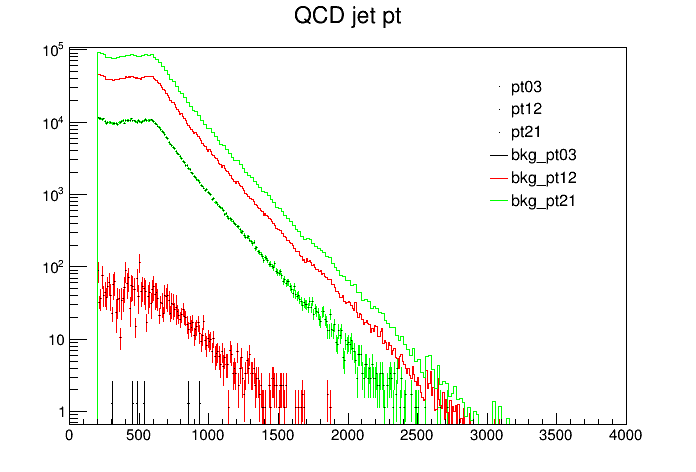

In [20]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    if("QCD__pt" in f.GetName() and not "ptTIGHT" in f.GetName() and not "ptLOOSE" in f.GetName()):
        for i in range(njet+1):
            if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                arr.append(f.GetName().split("__")[1].split("_")[1])
arrs = set(arr)
print(arrs)

pt={"0":[],"1":[],"2":[],"3":[]}
ptsums0=TH1F("pt03","pt03",1000,0,10000)
ptsums1=TH1F("pt12","pt12",1000,0,10000)
ptsums2=TH1F("pt21","pt21",1000,0,10000)
ptsums3=TH1F("pt30","pt30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__pt" in f.GetName() and not "ptTIGHT" in f.GetName() and not "ptLOOSE" in f.GetName()):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                pt[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in pt[str(i)]:
        if i == 0:
            print(j)
            ptsums0 += FromFlatPandas.Get(j)
        if i == 1:
            print(j)
            ptsums1 += FromFlatPandas.Get(j)
        if i == 2:
            print(j)
            ptsums2 += FromFlatPandas.Get(j)
        if i == 3:
            print(j)
            ptsums3 += FromFlatPandas.Get(j)

bkg_pt={"0":[],"1":[],"2":[],"3":[]}
bkg_ptsums0=TH1F("bkg_pt03","bkg_pt03",1000,0,10000)
bkg_ptsums1=TH1F("bkg_pt12","bkg_pt12",1000,0,10000)
bkg_ptsums2=TH1F("bkg_pt21","bkg_pt21",1000,0,10000)
bkg_ptsums3=TH1F("bkg_pt30","bkg_pt30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__bkg_pt" in f.GetName() and not "ptTIGHT" in f.GetName() and not "ptLOOSE" in f.GetName()):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                bkg_pt[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_pt[str(i)]:
        if i == 0:
            print(j)
            bkg_ptsums0 += FromFlatPandas.Get(j)
        if i == 1:
            print(j)
            bkg_ptsums1 += FromFlatPandas.Get(j)
        if i == 2:
            print(j)
            bkg_ptsums2 += FromFlatPandas.Get(j)
        if i == 3:
            print(j)
            bkg_ptsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptsums0.SetTitle("QCD jet pt")
ptsums0.SetStats(0)
ptsums0.GetXaxis().SetRangeUser(0,4000)
ptsums0.SetMaximum(1.2*max(max(ptsums0),max(ptsums1),max(ptsums2),max(bkg_ptsums0),max(bkg_ptsums1),max(bkg_ptsums2)))

ptsums0.SetLineColor(1)
ptsums1.SetLineColor(2)
ptsums2.SetLineColor(3)
ptsums3.SetLineColor(4)

bkg_ptsums0.SetLineColor(1)
bkg_ptsums1.SetLineColor(2)
bkg_ptsums2.SetLineColor(3)
bkg_ptsums3.SetLineColor(4)

ptsums0.Draw()
ptsums1.Draw("same")
ptsums2.Draw("same")
#ptsums3.Draw("same")
bkg_ptsums0.Draw("histsame")
bkg_ptsums1.Draw("histsame")
bkg_ptsums2.Draw("histsame")
#bkg_ptsums3.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptsums0,'pt03','P')
leg1.AddEntry(ptsums1,'pt12','P')
leg1.AddEntry(ptsums2,'pt21','P')
#leg1.AddEntry(ptsums3,'pt30','P')
leg1.AddEntry(bkg_ptsums0,'bkg_pt03','L')
leg1.AddEntry(bkg_ptsums1,'bkg_pt12','L')
leg1.AddEntry(bkg_ptsums2,'bkg_pt21','L')
#leg1.AddEntry(bkg_ptsums3,'bkg_pt30','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1F::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <TH1F::Divide>: Cannot divide histograms with different number of bins
Error in <TH1F::Divide>: Cannot divide histograms with different number of bins
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


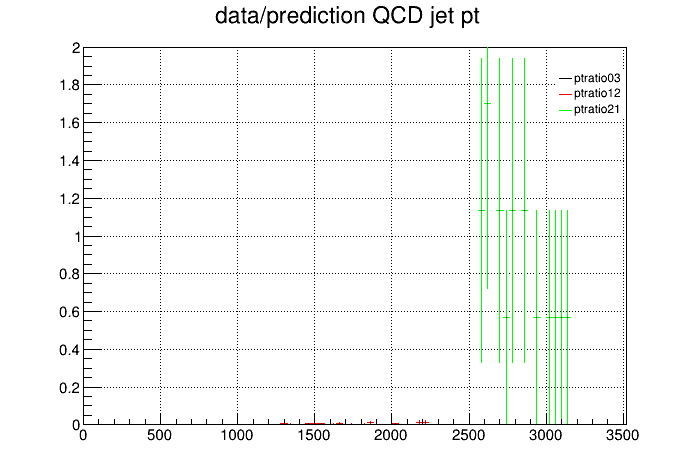

In [21]:
totQCDjetpt = ptsums0 + ptsums1 + ptsums2 + ptsums3
bkg_totQCDjetpt = bkg_ptsums0 + bkg_ptsums1 + bkg_ptsums2 + bkg_ptsums3

ptsums0.Rebin(4)
bkg_ptsums0.Rebin(4)
ptsums1.Rebin(4)
bkg_ptsums1.Rebin(4)
ptsums2.Rebin(4)
bkg_ptsums2.Rebin(4)
ptsums3.Rebin(4)
bkg_ptsums3.Rebin(4)
totQCDjetpt.Rebin(4)
bkg_totQCDjetpt.Rebin(4)


ptratio03 = ptsums0/bkg_ptsums0
ptratio12 = ptsums1/bkg_ptsums1
ptratio21 = ptsums2/bkg_ptsums2
ptratio30 = ptsums3/bkg_ptsums3
ptratioTOT = totQCDjetpt/bkg_totQCDjetpt

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

ptratio03.SetTitle("data/prediction QCD jet pt;;")
ptratio03.GetXaxis().SetRangeUser(0,3500)
ptratio03.SetStats(0)
ptratio03.SetMaximum(2)
ptratio03.SetMinimum(0)

ptratio03.SetLineColor(1)
ptratio12.SetLineColor(2)
ptratio21.SetLineColor(3)
ptratio30.SetLineColor(4)
ptratio03.Draw("P")
ptratio12.Draw("same")
ptratio21.Draw("same")
#ptratio30.Draw("same")

leg1 = TLegend(0.80, 0.75, 0.90, 0.85)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(ptratio03,'ptratio03','L')
leg1.AddEntry(ptratio12,'ptratio12','L')
leg1.AddEntry(ptratio21,'ptratio21','L')
#leg1.AddEntry(ptratio30,'ptratio30','L')


leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


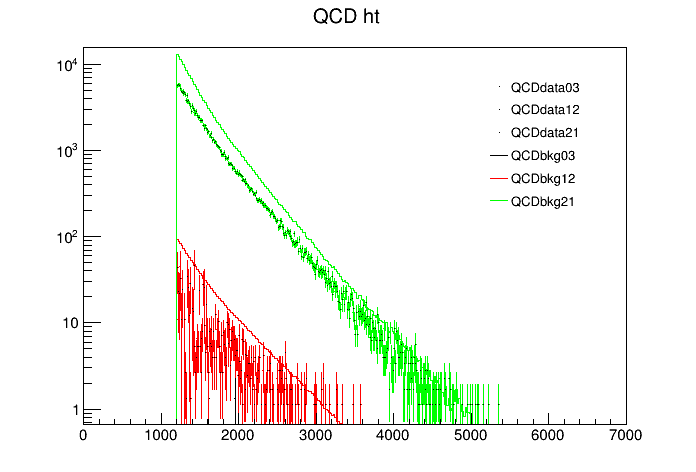

In [22]:
QCDdata03 = FromFlatPandas.QCD_HT1000to1500__ht_LT03 + FromFlatPandas.QCD_HT1500to2000__ht_LT03 + FromFlatPandas.QCD_HT2000toInf__ht_LT03
QCDdata12 = FromFlatPandas.QCD_HT1000to1500__ht_LT12 + FromFlatPandas.QCD_HT1500to2000__ht_LT12 + FromFlatPandas.QCD_HT2000toInf__ht_LT12
QCDdata21 = FromFlatPandas.QCD_HT1000to1500__ht_LT21 + FromFlatPandas.QCD_HT1500to2000__ht_LT21 + FromFlatPandas.QCD_HT2000toInf__ht_LT21

QCDbkg03 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT03 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT03 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT03
QCDbkg12 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT12 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT12 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT12
QCDbkg21 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT21 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT21 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT21

totQCDhtdata = QCDdata03 + QCDdata12 + QCDdata21
totQCDhtbkg = QCDbkg03 + QCDbkg12 + QCDbkg21

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

QCDdata03.SetTitle("QCD ht;;")
QCDdata03.SetStats(0)
QCDdata03.SetMaximum(max(max(totQCDhtdata),max(totQCDhtbkg))*1.2)

QCDdata03.SetLineColor(1)
QCDdata12.SetLineColor(2)
QCDdata21.SetLineColor(3)
#totQCDhtdata.SetLineColor(4)
QCDdata03.Draw("")
QCDdata12.Draw("same")
QCDdata21.Draw("same")
#totQCDhtdata.Draw("same")


QCDbkg03.SetLineColor(1)
QCDbkg12.SetLineColor(2)
QCDbkg21.SetLineColor(3)
#totQCDhtbkg.SetLineColor(4)
QCDbkg03.Draw("histsame")
QCDbkg12.Draw("histsame")
QCDbkg21.Draw("histsame")
#totQCDhtbkg.Draw("histsame")

canv.SetLogy()

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(QCDdata03,'QCDdata03','P')
leg1.AddEntry(QCDdata12,'QCDdata12','P')
leg1.AddEntry(QCDdata21,'QCDdata21','P')
#leg1.AddEntry(totQCDhtdata,'totQCDhtdata','P')

leg1.AddEntry(QCDbkg03,'QCDbkg03','L')
leg1.AddEntry(QCDbkg12,'QCDbkg12','L')
leg1.AddEntry(QCDbkg21,'QCDbkg21','L')
#leg1.AddEntry(totQCDhtbkg,'totQCDhtbkg','L')

leg1.Draw()

canv.RedrawAxis()
canv.Update()
canv.Draw()

Warning in <TH1F::Rebin>: ngroup=4 is not an exact divider of nbins=350.
Warning in <TH1F::Rebin>: ngroup=4 is not an exact divider of nbins=350.
Warning in <TH1F::Rebin>: ngroup=4 is not an exact divider of nbins=350.
Warning in <TH1F::Rebin>: ngroup=4 is not an exact divider of nbins=350.
Error in <TH1F::Divide>: Cannot divide histograms with different number of bins
Error in <TH1F::Divide>: Cannot divide histograms with different number of bins
Error in <TH1F::Divide>: Cannot divide histograms with different number of bins
Error in <TH1F::Divide>: Cannot divide histograms with different number of bins
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


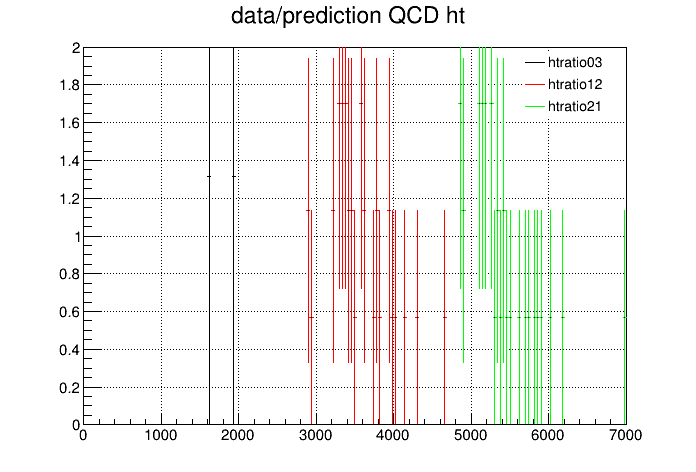

In [23]:
QCDdata03.Rebin(4)
QCDbkg03.Rebin(4)
QCDdata12.Rebin(4)
QCDbkg12.Rebin(4)
QCDdata21.Rebin(4)
QCDbkg21.Rebin(4)
totQCDhtdata.Rebin(4)
totQCDhtbkg.Rebin(4)


htratio03 = QCDdata03/QCDbkg03
htratio12 = QCDdata12/QCDbkg12
htratio21 = QCDdata21/QCDbkg21
totQCDhtratio = totQCDhtdata / totQCDhtbkg

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

htratio03.SetTitle("data/prediction QCD ht;;")
htratio03.SetStats(0)
htratio03.SetMaximum(2)
htratio03.SetMinimum(0)

htratio03.SetLineColor(1)
htratio12.SetLineColor(2)
htratio21.SetLineColor(3)
totQCDhtratio.SetLineColor(4)
htratio03.Draw("P")
htratio12.Draw("same")
htratio21.Draw("same")
#totQCDhtratio.Draw("same")

leg1 = TLegend(0.75, 0.75, 0.90, 0.89)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(htratio03,'htratio03','L')
leg1.AddEntry(htratio12,'htratio12','L')
leg1.AddEntry(htratio21,'htratio21','L')
#leg1.AddEntry(totQCDhtratio,'totQCDhtratio','L')

leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Update()
canv.Draw()

In [24]:
#toyspread=[]
#for f in FromFlatPandas.GetListOfKeys():
#    if("QCD__bkg_ht_toyspread" in f.GetName()):
#        toyspread.append(f.GetName())
#
#canv=TCanvas("canv","canv",700,500)
#color = 1
#num = 1
#for item in toyspread:
#    FromFlatPandas.Get(item).SetLineColor(color)
#    color+=1
#    if num == 1:
#        temphist = FromFlatPandas.Get(item)
#        temphist.SetTitle("bkg_ht_toyspread")
#        temphist.SetStats(1)
#        temphist.Rebin(20)
#        temphist.Draw("")
#        num+=1
#    elif num > 1:
#        temphist = FromFlatPandas.Get(item)
#        temphist.Rebin(20)
#        temphist.Draw("same")
#
#canv.SetLogy()
#canv.RedrawAxis()
#canv.Update()
#canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


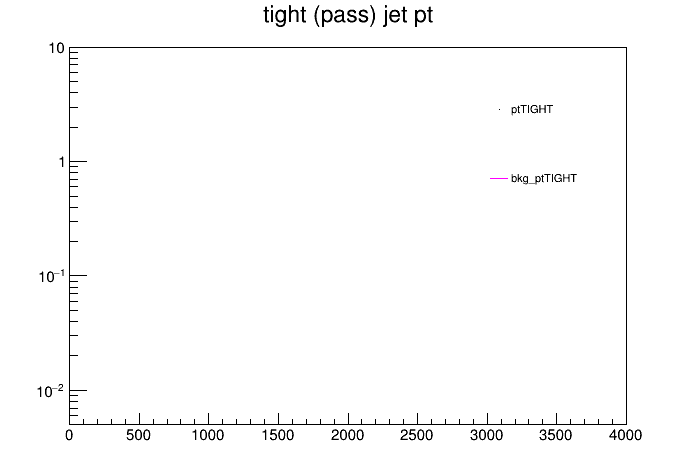

In [25]:
ptTIGHTsum = TH1F("ptTIGHTsum","ptTIGHTsum",1000,0,10000)
bkg_ptTIGHTsum = TH1F("bkg_ptTIGHTsum","bkg_ptTIGHTsum",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptTIGHT" in f.GetName() and not "LT30" in f.GetName()):
        print("ptTIGHT, Integral: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
        ptTIGHThist = FromFlatPandas.Get(f.GetName())
        ptTIGHTsum += ptTIGHThist
    elif("QCD__bkg_ptTIGHT" in f.GetName() and not "LT30" in f.GetName()):
        print("bkg_ptTIGHT, Integral: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
        bkg_ptTIGHThist = FromFlatPandas.Get(f.GetName())
        bkg_ptTIGHTsum += bkg_ptTIGHThist

canv=TCanvas("canv","canv",700,500)

ptTIGHTsum.SetTitle("tight (pass) jet pt")
ptTIGHTsum.SetStats(0)
ptTIGHTsum.GetXaxis().SetRangeUser(0,4000)
ptTIGHTsum.SetMaximum(1.2*max(max(ptTIGHTsum),max(bkg_ptTIGHTsum)))

ptTIGHTsum.SetLineColor(4)
bkg_ptTIGHTsum.SetLineColor(6)

ptTIGHTsum.Draw()
bkg_ptTIGHTsum.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTsum,'ptTIGHT','P')
leg1.AddEntry(bkg_ptTIGHTsum,'bkg_ptTIGHT','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


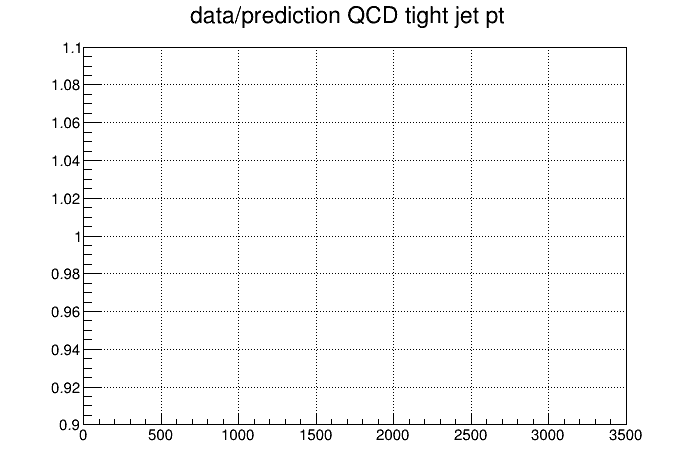

In [26]:
ptTIGHTsum.Rebin(2)
bkg_ptTIGHTsum.Rebin(2)
ptTIGHTratio = ptTIGHTsum / bkg_ptTIGHTsum

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

ptTIGHTratio.SetTitle("data/prediction QCD tight jet pt;;")
ptTIGHTratio.GetXaxis().SetRangeUser(0,3500)
ptTIGHTratio.SetStats(0)
ptTIGHTratio.SetMaximum(1.1)
ptTIGHTratio.SetMinimum(0.9)

ptTIGHTratio.SetLineColor(9)
ptTIGHTratio.Draw("P")

canv.SetGrid()
canv.RedrawAxis()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


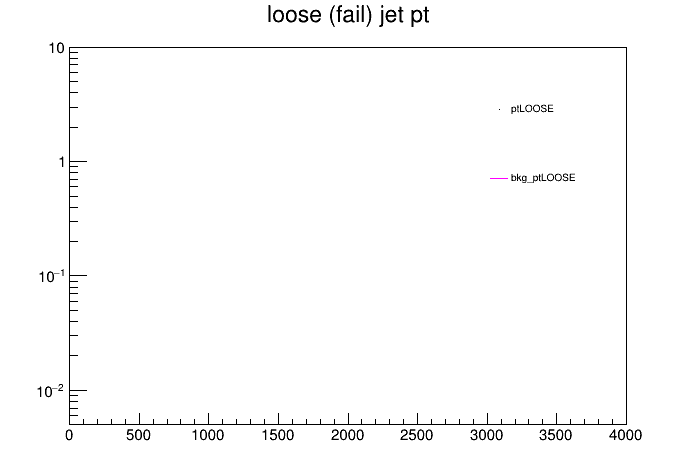

In [27]:
ptLOOSEsum = TH1F("ptLOOSEsum","ptLOOSEsum",1000,0,10000)
bkg_ptLOOSEsum = TH1F("bkg_ptLOOSEsum","bkg_ptLOOSEsum",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptLOOSE" in f.GetName() and not "LT03" in f.GetName()):
        print("ptLOOSE, Integral: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
        ptLOOSEhist = FromFlatPandas.Get(f.GetName())
        ptLOOSEsum += ptLOOSEhist
    elif("QCD__bkg_ptLOOSE" in f.GetName() and not "LT03" in f.GetName()):
        print("bkg_ptLOOSE, Integral: ",f.GetName(),FromFlatPandas.Get(f.GetName()).Integral())
        bkg_ptLOOSEhist = FromFlatPandas.Get(f.GetName())
        bkg_ptLOOSEsum += bkg_ptLOOSEhist

canv=TCanvas("canv","canv",700,500)

ptLOOSEsum.SetTitle("loose (fail) jet pt")
ptLOOSEsum.SetStats(0)
ptLOOSEsum.GetXaxis().SetRangeUser(0,4000)
ptLOOSEsum.SetMaximum(1.2*max(max(ptLOOSEsum),max(bkg_ptLOOSEsum)))

ptLOOSEsum.SetLineColor(4)
bkg_ptLOOSEsum.SetLineColor(6)

ptLOOSEsum.Draw()
bkg_ptLOOSEsum.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptLOOSEsum,'ptLOOSE','P')
leg1.AddEntry(bkg_ptLOOSEsum,'bkg_ptLOOSE','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


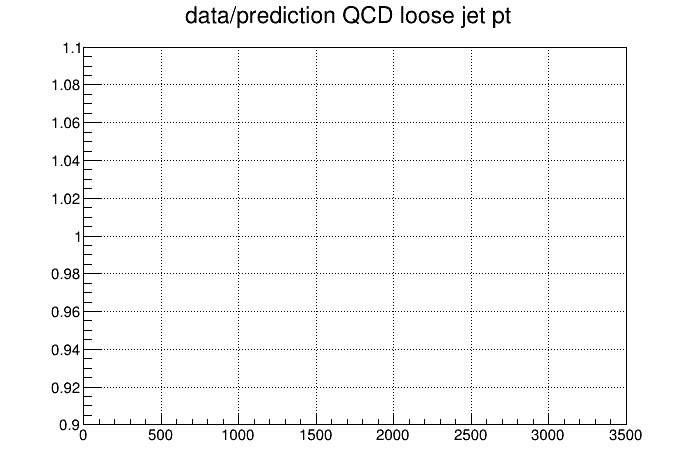

In [28]:
ptLOOSEsum.Rebin(2)
bkg_ptLOOSEsum.Rebin(2)
ptLOOSEratio = ptLOOSEsum / bkg_ptLOOSEsum

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

ptLOOSEratio.SetTitle("data/prediction QCD loose jet pt;;")
ptLOOSEratio.GetXaxis().SetRangeUser(0,3500)
ptLOOSEratio.SetStats(0)
ptLOOSEratio.SetMaximum(1.1)
ptLOOSEratio.SetMinimum(0.9)

ptLOOSEratio.SetLineColor(9)
ptLOOSEratio.Draw("P")

canv.SetGrid()
canv.RedrawAxis()
canv.Draw()

set()


Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT03 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT12 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT21 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT30 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT03 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT12 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT21 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT30 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


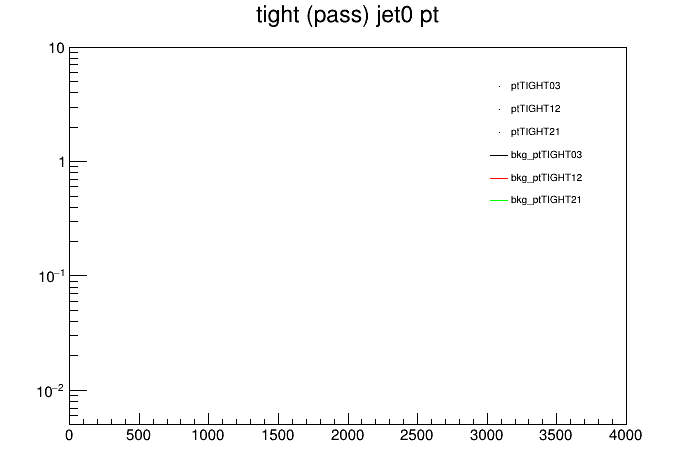

In [29]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptTIGHT0" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
        for i in range(njet+1):
            if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                arr.append(f.GetName().split("__")[1].split("_")[1])
arrs = set(arr)
print(arrs)

ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
ptTIGHTsums0=TH1F("ptTIGHT03","ptTIGHT03",1000,0,10000)
ptTIGHTsums1=TH1F("ptTIGHT12","ptTIGHT12",1000,0,10000)
ptTIGHTsums2=TH1F("ptTIGHT21","ptTIGHT21",1000,0,10000)
ptTIGHTsums3=TH1F("ptTIGHT30","ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptTIGHT0" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            ptTIGHTsums3 += FromFlatPandas.Get(j)

bkg_ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
bkg_ptTIGHTsums0=TH1F("bkg_ptTIGHT03","bkg_ptTIGHT03",1000,0,10000)
bkg_ptTIGHTsums1=TH1F("bkg_ptTIGHT12","bkg_ptTIGHT12",1000,0,10000)
bkg_ptTIGHTsums2=TH1F("bkg_ptTIGHT21","bkg_ptTIGHT21",1000,0,10000)
bkg_ptTIGHTsums3=TH1F("bkg_ptTIGHT30","bkg_ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__bkg_ptTIGHT0" in f.GetName()):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                bkg_ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            bkg_ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            bkg_ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            bkg_ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            bkg_ptTIGHTsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptTIGHTsums0.SetTitle("tight (pass) jet0 pt")
ptTIGHTsums0.SetStats(0)
ptTIGHTsums0.GetXaxis().SetRangeUser(0,4000)
ptTIGHTsums0.SetMaximum(1.2*max(max(ptTIGHTsums0),max(ptTIGHTsums1),max(ptTIGHTsums2),max(bkg_ptTIGHTsums0),max(bkg_ptTIGHTsums1),max(bkg_ptTIGHTsums2)))

ptTIGHTsums0.SetLineColor(1)
ptTIGHTsums1.SetLineColor(2)
ptTIGHTsums2.SetLineColor(3)

bkg_ptTIGHTsums0.SetLineColor(1)
bkg_ptTIGHTsums1.SetLineColor(2)
bkg_ptTIGHTsums2.SetLineColor(3)

ptTIGHTsums0.Draw()
ptTIGHTsums1.Draw("same")
ptTIGHTsums2.Draw("same")
bkg_ptTIGHTsums0.Draw("histsame")
bkg_ptTIGHTsums1.Draw("histsame")
bkg_ptTIGHTsums2.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTsums0,'ptTIGHT03','P')
leg1.AddEntry(ptTIGHTsums1,'ptTIGHT12','P')
leg1.AddEntry(ptTIGHTsums2,'ptTIGHT21','P')
leg1.AddEntry(bkg_ptTIGHTsums0,'bkg_ptTIGHT03','L')
leg1.AddEntry(bkg_ptTIGHTsums1,'bkg_ptTIGHT12','L')
leg1.AddEntry(bkg_ptTIGHTsums2,'bkg_ptTIGHT21','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


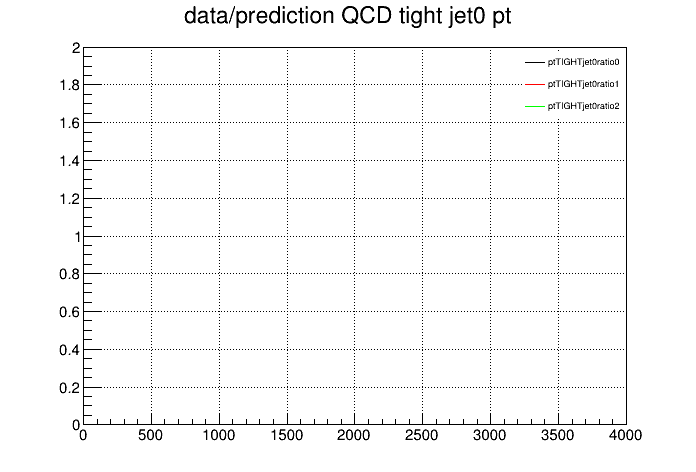

In [30]:
ptTIGHTsums0.Rebin(4)
bkg_ptTIGHTsums0.Rebin(4)
ptTIGHTsums1.Rebin(4)
bkg_ptTIGHTsums1.Rebin(4)
ptTIGHTsums2.Rebin(4)
bkg_ptTIGHTsums2.Rebin(4)

ptTIGHTjet0ratio0 = ptTIGHTsums0/bkg_ptTIGHTsums0
ptTIGHTjet0ratio1 = ptTIGHTsums1/bkg_ptTIGHTsums1
ptTIGHTjet0ratio2 = ptTIGHTsums2/bkg_ptTIGHTsums2

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

ptTIGHTjet0ratio0.SetTitle("data/prediction QCD tight jet0 pt;;")
ptTIGHTjet0ratio0.SetStats(0)
ptTIGHTjet0ratio0.SetMaximum(2)
ptTIGHTjet0ratio0.SetMinimum(0)
ptTIGHTjet0ratio0.GetXaxis().SetRangeUser(0,4000)

ptTIGHTjet0ratio0.SetLineColor(1)
ptTIGHTjet0ratio1.SetLineColor(2)
ptTIGHTjet0ratio2.SetLineColor(3)
ptTIGHTjet0ratio0.Draw("P")
ptTIGHTjet0ratio1.Draw("same")
ptTIGHTjet0ratio2.Draw("same")

leg1 = TLegend(0.75, 0.75, 0.90, 0.89)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTjet0ratio0,'ptTIGHTjet0ratio0','L')
leg1.AddEntry(ptTIGHTjet0ratio1,'ptTIGHTjet0ratio1','L')
leg1.AddEntry(ptTIGHTjet0ratio2,'ptTIGHTjet0ratio2','L')
leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Update()
canv.Draw()

set()


Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT03 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT12 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT21 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT30 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT03 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT12 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT21 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT30 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


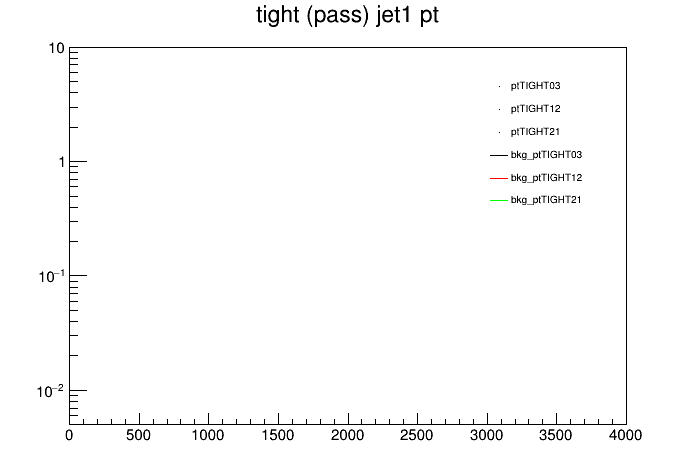

In [31]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptTIGHT1" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
        for i in range(njet+1):
            if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                arr.append(f.GetName().split("__")[1].split("_")[1])
arrs = set(arr)
print(arrs)

ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
ptTIGHTsums0=TH1F("ptTIGHT03","ptTIGHT03",1000,0,10000)
ptTIGHTsums1=TH1F("ptTIGHT12","ptTIGHT12",1000,0,10000)
ptTIGHTsums2=TH1F("ptTIGHT21","ptTIGHT21",1000,0,10000)
ptTIGHTsums3=TH1F("ptTIGHT30","ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptTIGHT1" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            ptTIGHTsums3 += FromFlatPandas.Get(j)

bkg_ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
bkg_ptTIGHTsums0=TH1F("bkg_ptTIGHT03","bkg_ptTIGHT03",1000,0,10000)
bkg_ptTIGHTsums1=TH1F("bkg_ptTIGHT12","bkg_ptTIGHT12",1000,0,10000)
bkg_ptTIGHTsums2=TH1F("bkg_ptTIGHT21","bkg_ptTIGHT21",1000,0,10000)
bkg_ptTIGHTsums3=TH1F("bkg_ptTIGHT30","bkg_ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__bkg_ptTIGHT1" in f.GetName()):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                bkg_ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            bkg_ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            bkg_ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            bkg_ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            bkg_ptTIGHTsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptTIGHTsums0.SetTitle("tight (pass) jet1 pt")
ptTIGHTsums0.SetStats(0)
ptTIGHTsums0.GetXaxis().SetRangeUser(0,4000)
ptTIGHTsums0.SetMaximum(1.2*max(max(ptTIGHTsums0),max(ptTIGHTsums1),max(ptTIGHTsums2),max(bkg_ptTIGHTsums0),max(bkg_ptTIGHTsums1),max(bkg_ptTIGHTsums2)))

ptTIGHTsums0.SetLineColor(1)
ptTIGHTsums1.SetLineColor(2)
ptTIGHTsums2.SetLineColor(3)

bkg_ptTIGHTsums0.SetLineColor(1)
bkg_ptTIGHTsums1.SetLineColor(2)
bkg_ptTIGHTsums2.SetLineColor(3)

ptTIGHTsums0.Draw()
ptTIGHTsums1.Draw("same")
ptTIGHTsums2.Draw("same")
bkg_ptTIGHTsums0.Draw("histsame")
bkg_ptTIGHTsums1.Draw("histsame")
bkg_ptTIGHTsums2.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTsums0,'ptTIGHT03','P')
leg1.AddEntry(ptTIGHTsums1,'ptTIGHT12','P')
leg1.AddEntry(ptTIGHTsums2,'ptTIGHT21','P')
leg1.AddEntry(bkg_ptTIGHTsums0,'bkg_ptTIGHT03','L')
leg1.AddEntry(bkg_ptTIGHTsums1,'bkg_ptTIGHT12','L')
leg1.AddEntry(bkg_ptTIGHTsums2,'bkg_ptTIGHT21','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


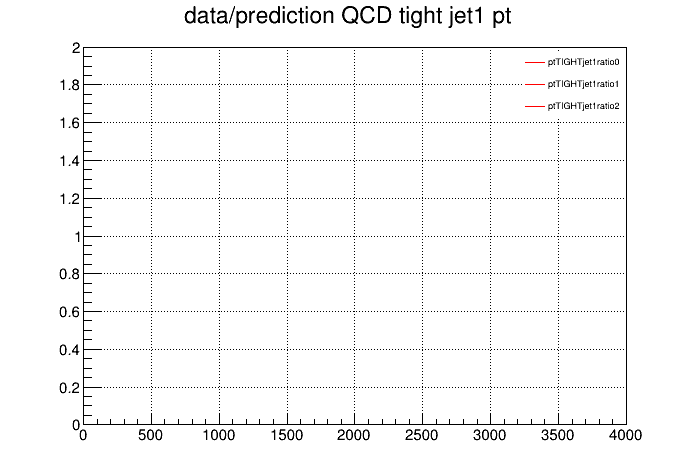

In [32]:
ptTIGHTsums0.Rebin(4)
bkg_ptTIGHTsums0.Rebin(4)
ptTIGHTsums1.Rebin(4)
bkg_ptTIGHTsums1.Rebin(4)
ptTIGHTsums2.Rebin(4)
bkg_ptTIGHTsums2.Rebin(4)

ptTIGHTjet1ratio0 = ptTIGHTsums0/bkg_ptTIGHTsums0
ptTIGHTjet1ratio1 = ptTIGHTsums1/bkg_ptTIGHTsums1
ptTIGHTjet1ratio2 = ptTIGHTsums2/bkg_ptTIGHTsums2

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

ptTIGHTjet1ratio0.SetTitle("data/prediction QCD tight jet1 pt;;")
ptTIGHTjet1ratio0.SetStats(0)
ptTIGHTjet1ratio0.SetMaximum(2)
ptTIGHTjet1ratio0.SetMinimum(0)
ptTIGHTjet1ratio0.GetXaxis().SetRangeUser(0,4000)

ptTIGHTjet1ratio0.SetLineColor(1)
ptTIGHTjet1ratio1.SetLineColor(2)
ptTIGHTjet1ratio2.SetLineColor(3)

ptTIGHTjet1ratio0.Draw("P")
ptTIGHTjet1ratio1.Draw("same")
ptTIGHTjet1ratio2.Draw("same")

leg1 = TLegend(0.75, 0.75, 0.90, 0.89)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTjet1ratio1,'ptTIGHTjet1ratio0','L')
leg1.AddEntry(ptTIGHTjet1ratio1,'ptTIGHTjet1ratio1','L')
leg1.AddEntry(ptTIGHTjet1ratio1,'ptTIGHTjet1ratio2','L')
leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Update()
canv.Draw()

set()


Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT03 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT12 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT21 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ptTIGHT30 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT03 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT12 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT21 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bkg_ptTIGHT30 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


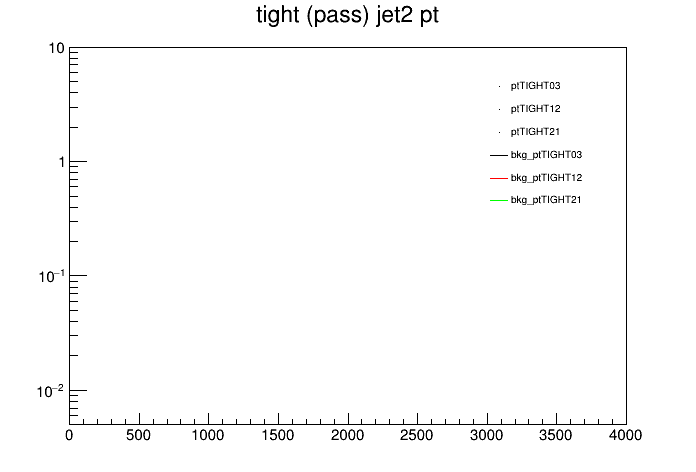

In [33]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptTIGHT2" in f.GetName()):
        for i in range(njet+1):
            if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                arr.append(f.GetName().split("__")[1].split("_")[1])
arrs = set(arr)
print(arrs)

ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
ptTIGHTsums0=TH1F("ptTIGHT03","ptTIGHT03",1000,0,10000)
ptTIGHTsums1=TH1F("ptTIGHT12","ptTIGHT12",1000,0,10000)
ptTIGHTsums2=TH1F("ptTIGHT21","ptTIGHT21",1000,0,10000)
ptTIGHTsums3=TH1F("ptTIGHT30","ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__ptTIGHT2" in f.GetName()):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            ptTIGHTsums3 += FromFlatPandas.Get(j)

bkg_ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
bkg_ptTIGHTsums0=TH1F("bkg_ptTIGHT03","bkg_ptTIGHT03",1000,0,10000)
bkg_ptTIGHTsums1=TH1F("bkg_ptTIGHT12","bkg_ptTIGHT12",1000,0,10000)
bkg_ptTIGHTsums2=TH1F("bkg_ptTIGHT21","bkg_ptTIGHT21",1000,0,10000)
bkg_ptTIGHTsums3=TH1F("bkg_ptTIGHT30","bkg_ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if("QCD__bkg_ptTIGHT2" in f.GetName()):
        for i in range(njet+1):
            if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                bkg_ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            bkg_ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            bkg_ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            bkg_ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            bkg_ptTIGHTsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptTIGHTsums0.SetTitle("tight (pass) jet2 pt")
ptTIGHTsums0.SetStats(0)
ptTIGHTsums0.GetXaxis().SetRangeUser(0,4000)
ptTIGHTsums0.SetMaximum(1.2*max(max(ptTIGHTsums0),max(ptTIGHTsums1),max(ptTIGHTsums2),max(bkg_ptTIGHTsums0),max(bkg_ptTIGHTsums1),max(bkg_ptTIGHTsums2)))

ptTIGHTsums0.SetLineColor(1)
ptTIGHTsums1.SetLineColor(2)
ptTIGHTsums2.SetLineColor(3)

bkg_ptTIGHTsums0.SetLineColor(1)
bkg_ptTIGHTsums1.SetLineColor(2)
bkg_ptTIGHTsums2.SetLineColor(3)

ptTIGHTsums0.Draw()
ptTIGHTsums1.Draw("same")
ptTIGHTsums2.Draw("same")
bkg_ptTIGHTsums0.Draw("histsame")
bkg_ptTIGHTsums1.Draw("histsame")
bkg_ptTIGHTsums2.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTsums0,'ptTIGHT03','P')
leg1.AddEntry(ptTIGHTsums1,'ptTIGHT12','P')
leg1.AddEntry(ptTIGHTsums2,'ptTIGHT21','P')
leg1.AddEntry(bkg_ptTIGHTsums0,'bkg_ptTIGHT03','L')
leg1.AddEntry(bkg_ptTIGHTsums1,'bkg_ptTIGHT12','L')
leg1.AddEntry(bkg_ptTIGHTsums2,'bkg_ptTIGHT21','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


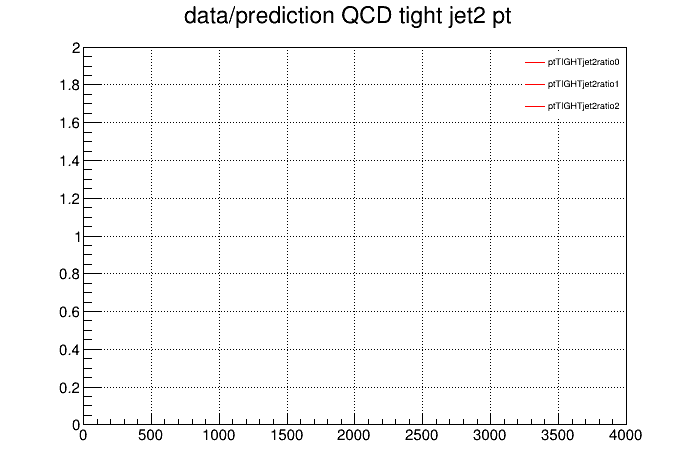

In [34]:
ptTIGHTsums0.Rebin(4)
bkg_ptTIGHTsums0.Rebin(4)
ptTIGHTsums1.Rebin(4)
bkg_ptTIGHTsums1.Rebin(4)
ptTIGHTsums2.Rebin(4)
bkg_ptTIGHTsums2.Rebin(4)

ptTIGHTjet2ratio0 = ptTIGHTsums0/bkg_ptTIGHTsums0
ptTIGHTjet2ratio1 = ptTIGHTsums1/bkg_ptTIGHTsums1
ptTIGHTjet2ratio2 = ptTIGHTsums2/bkg_ptTIGHTsums2

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

ptTIGHTjet2ratio0.SetTitle("data/prediction QCD tight jet2 pt;;")
ptTIGHTjet2ratio0.SetStats(0)
ptTIGHTjet2ratio0.SetMaximum(2)
ptTIGHTjet2ratio0.SetMinimum(0)
ptTIGHTjet2ratio0.GetXaxis().SetRangeUser(0,4000)

ptTIGHTjet2ratio0.SetLineColor(1)
ptTIGHTjet2ratio1.SetLineColor(2)
ptTIGHTjet2ratio2.SetLineColor(3)

ptTIGHTjet2ratio0.Draw("P")
ptTIGHTjet2ratio1.Draw("same")
ptTIGHTjet2ratio2.Draw("same")

leg1 = TLegend(0.75, 0.75, 0.90, 0.89)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTjet2ratio1,'ptTIGHTjet2ratio0','L')
leg1.AddEntry(ptTIGHTjet2ratio1,'ptTIGHTjet2ratio1','L')
leg1.AddEntry(ptTIGHTjet2ratio1,'ptTIGHTjet2ratio2','L')
leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Update()
canv.Draw()